In this notebook a more sophisticated algorithm is presented. The tree levels are built seperately (because they represent different days).  

The tree is visualized, the longest path can be found (needs to be checked)

In [1]:
%matplotlib inline
import os
import numpy as np
import sys
import matplotlib.pyplot as plt

# adding project folder to lib search path
project = os.path.split(os.getcwd())[0]
if project not in sys.path:
    sys.path.append(project)
    
from HIV_project.scripts.loader import Loader
from HIV_project.scripts.patient import Patient
from HIV_project.scripts.aa_properties import aaprop_sequence
from HIV_project.scripts.tree_building import Tree
from igraph import *

In [2]:
# selecting patient
patient = Patient('p1')

No haplotype for patient p1 for region vpr
No haplotype for patient p1 for region p1
No haplotype for patient p1 for region p2
No haplotype for patient p1 for region p6
No haplotype for patient p1 for region p7


/Users/a.ovsiannikova/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


In [3]:
# building a tree
tree = Tree(patient.regions['RRE'])
tree.build()

In [4]:
# starting to plot the tree
vertices = [i for i in range(len(tree.mapping))]
edges = tree.graph

g = Graph()
g.add_vertices(vertices)

# setting correct weights
for edge in edges:
    g.add_edge(edge[0], edge[1], weight=edges[edge])

In [5]:
# this seems to be the longest path

def find_longest_path(g, tree):
    """ Finding the longest path in a graph
    Args:
        g (igraph.Graph): graph object with weights
        tree (tree): patient region tree 
    Return:
        max_weighted_lenght (list): vertices of longest path 
        longest_path (float): weight of longest path """
    paths = g.get_shortest_paths(0, weights='weight', mode='ALL')
    longest_path = None
    longest_path_id = -1
    max_weighted_lenght = -1
    
    for path_id, path in enumerate(paths):
        
        if path:
            first = 0
            path_weight = 0
            for second in range(1, len(path)):
                first_el, second_el = path[first], path[second]
                path_weight += tree.graph[(first_el, second_el)]
                first = second
            if max_weighted_lenght < path_weight:
                max_weighted_lenght = path_weight
                longest_path = path
                longest_path_id = path_id
    
    max_edges = g.get_shortest_paths(0, weights='weight', mode='ALL', output="epath")[longest_path_id]
    return max_weighted_lenght, longest_path, max_edges

In [6]:
# getting the longest path
max_weight, max_path, edges = find_longest_path(g, tree)
print(f'Longest path {max_path} has weight {int(max_weight)}')

Longest path [0, 4, 6, 9, 10, 12, 13, 17, 22, 30, 32] has weight 2340


In [7]:
# colouring the edges of the longest path
for edge_id in edges:
    g.es[edge_id]['color'] = 'red'

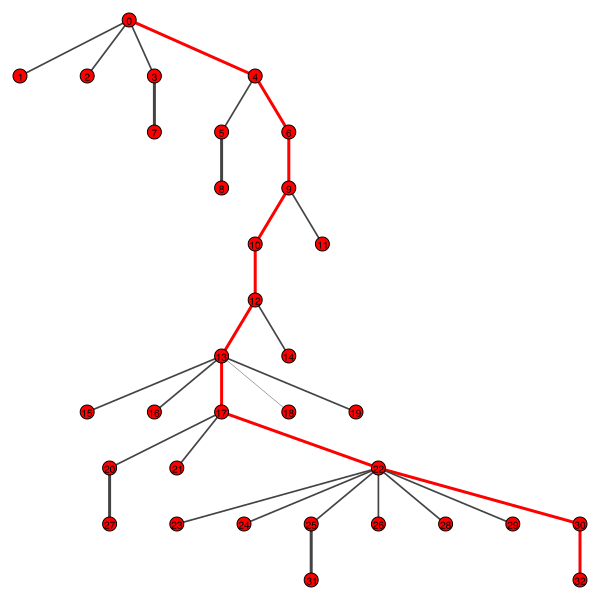

In [8]:
# plotting now
layout = g.layout_reingold_tilford(mode='in', root=[tree.mapping[(tree.start_day, tree.root.seq)]])

plot(g, layout=layout, vertex_label=vertices, vertex_label_size=10, vertex_size=14, 
     edge_width=rescale(g.es['weight'], out_range=(0.4, 3)))